## CNN-Based Image Classification using TensorFlow

# 🔹 Step 1: Import Required Libraries


In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


# 🔹 Step 2: Load & Preprocess Dataset

In [6]:
# Load CIFAR-10 Dataset
from tensorflow.keras.datasets import cifar10

# Load data and split into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical format (One-Hot Encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check shape of dataset
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)


# 🔹 Step 2.1: Display Sample Images with Labels

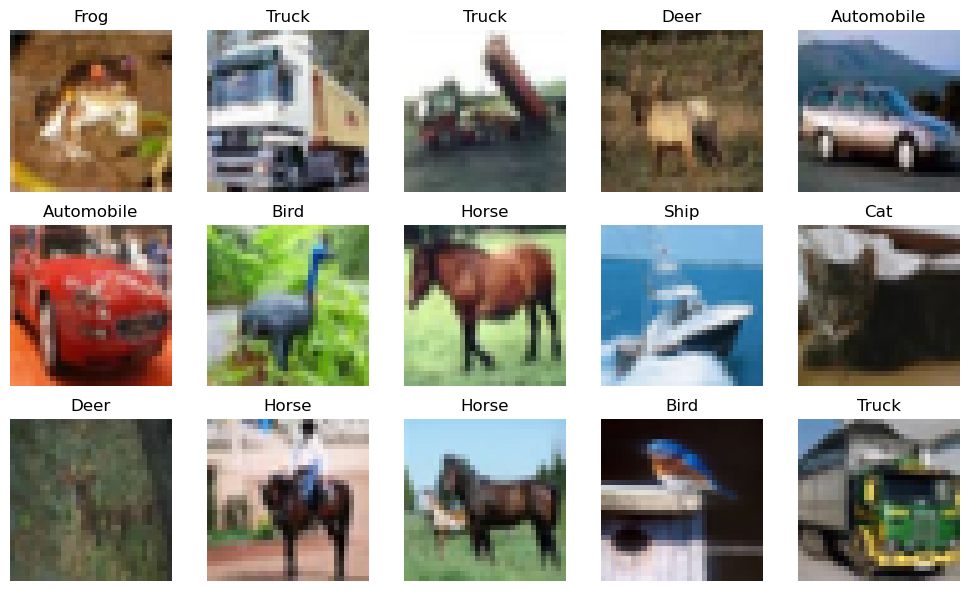

In [9]:
# Define class names for CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Plot sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 6))  # 3 rows, 5 columns

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])  # Show image
    ax.set_title(class_names[np.argmax(y_train[i])])  # Display label
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


# 🔹 Step 3: Build CNN Model

In [12]:
# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

# 🔹 Step 4: Train the Model

In [15]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 40ms/step - accuracy: 0.3346 - loss: 1.8214 - val_accuracy: 0.5405 - val_loss: 1.2790
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.5161 - loss: 1.3401 - val_accuracy: 0.6000 - val_loss: 1.1245
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5757 - loss: 1.2017 - val_accuracy: 0.6227 - val_loss: 1.0722
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6106 - loss: 1.1012 - val_accuracy: 0.6479 - val_loss: 1.0122
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6409 - loss: 1.0243 - val_accuracy: 0.6761 - val_loss: 0.9343


# 🔹 Step 5: Evaluate the Model

In [18]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6775 - loss: 0.9289
Test Accuracy: 0.68


# 🔹 Step 6: Visualize Training Performance

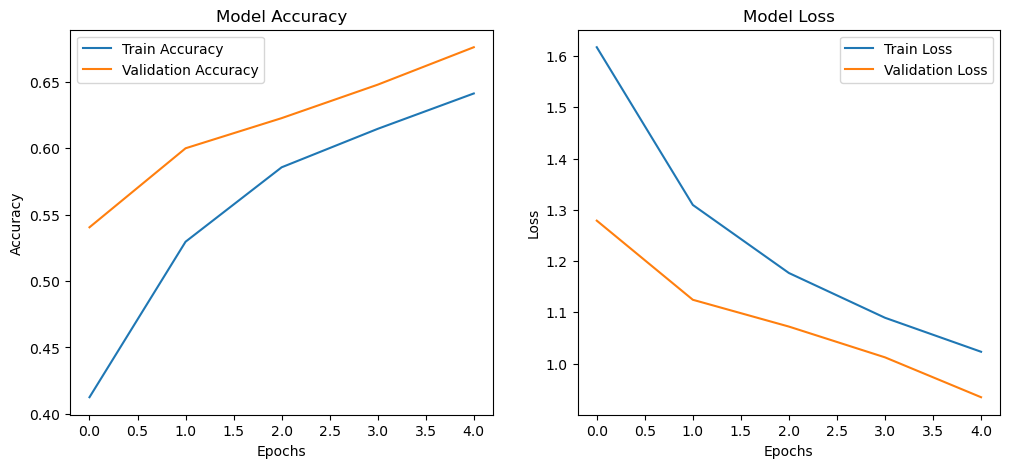

In [21]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# 🔹 Step 7: Confusion Matrix & Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


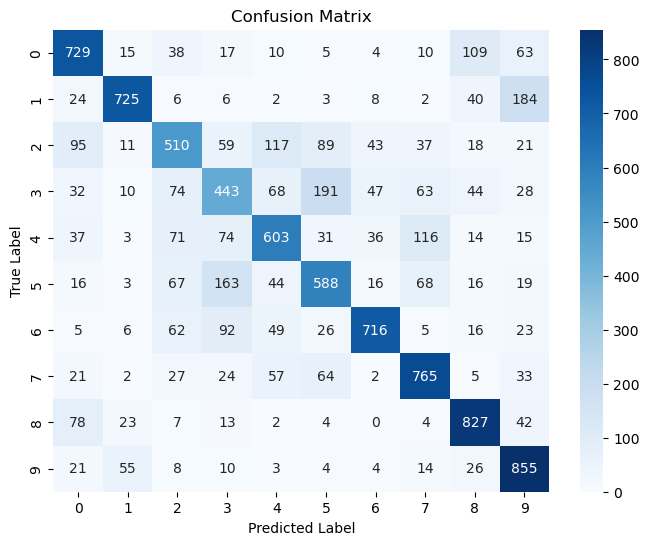

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.85      0.72      0.78      1000
           2       0.59      0.51      0.55      1000
           3       0.49      0.44      0.47      1000
           4       0.63      0.60      0.62      1000
           5       0.59      0.59      0.59      1000
           6       0.82      0.72      0.76      1000
           7       0.71      0.77      0.73      1000
           8       0.74      0.83      0.78      1000
           9       0.67      0.85      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



In [24]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))


# 🔹 Step 7.1: Display Images with Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


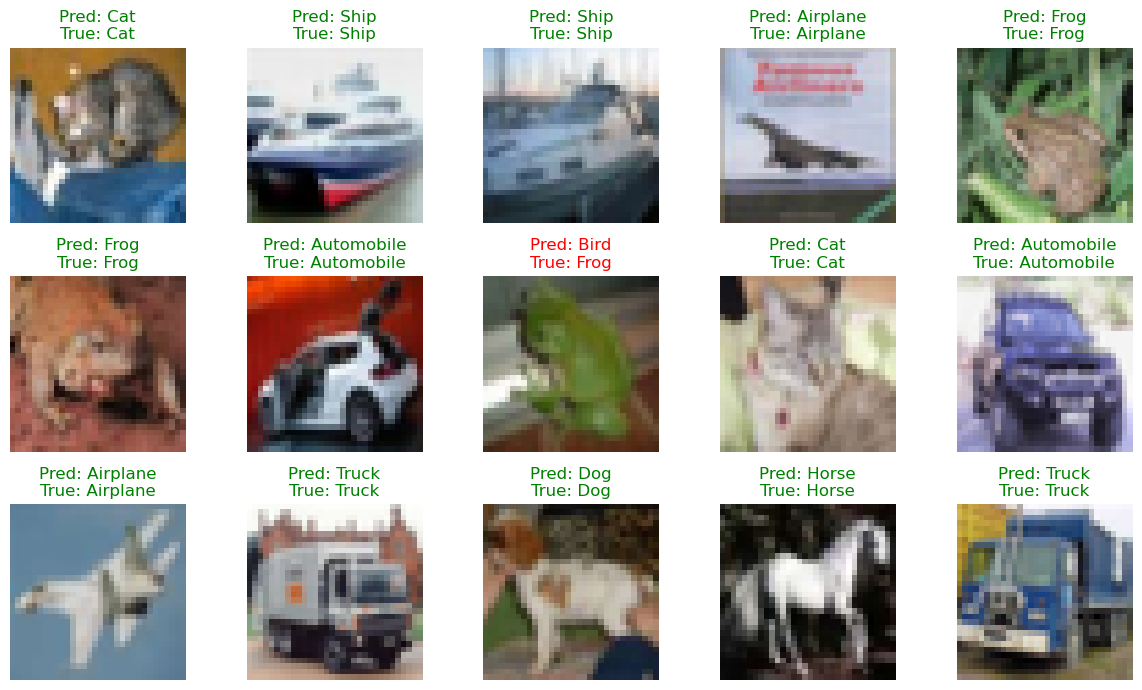

In [27]:
# Get model predictions on test images
y_pred = model.predict(X_test)  # Get probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class index
y_true_classes = np.argmax(y_test, axis=1)  # True labels

# Plot sample test images with predictions
fig, axes = plt.subplots(3, 5, figsize=(12, 7))  # 3 rows, 5 columns
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])  # Show image
    true_label = class_names[y_true_classes[i]]  # True label
    predicted_label = class_names[y_pred_classes[i]]  # Predicted label

    # Set title with color based on correctness
    color = "green" if true_label == predicted_label else "red"
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


# 🔹 Step 8: Save the Model

In [30]:
model.save("cnn_image_classifier.h5")
print("Model saved successfully!")


Model saved successfully!
